<a href="https://colab.research.google.com/github/juliettyi/ISIC/blob/master/ISIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import pandas as pd

BASE_DIR = '/content/gdrive/My Drive/ISIC'
df =  pd.read_csv(os.path.join(BASE_DIR, 'meta.csv'), sep=',')

# Data Exploration

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 11 columns):
id              23906 non-null object
age             23496 non-null float64
diag_confirm    23496 non-null object
anatom_site     12196 non-null object
sex             23484 non-null object
diag            23657 non-null object
benign          21678 non-null object
melanocytic     23661 non-null object
y               23906 non-null int64
x               23906 non-null int64
image_type      23901 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 2.0+ MB


In [0]:
df['diag_confirm'].unique()

array(['serial imaging showing no change', 'histopathology',
       'single image expert consensus', nan,
       'confocal microscopy with consensus dermoscopy'], dtype=object)

In [0]:
df['sex'].unique()

array(['male', nan, 'female'], dtype=object)

In [0]:
df.groupby('diag').size().sort_values(ascending=False)

diag
nevus                                 18566
melanoma                               2169
pigmented benign keratosis             1099
basal cell carcinoma                    586
seborrheic keratosis                    419
actinic keratosis                       329
vascular lesion                         142
dermatofibroma                          122
lentigo NOS                              71
solar lentigo                            57
squamous cell carcinoma                  29
lentigo simplex                          27
angioma                                  15
atypical melanocytic proliferation       13
other                                    10
scar                                      1
angiofibroma or fibrous papule            1
lichenoid keratosis                       1
dtype: int64

In [0]:
df.groupby('benign').size().sort_values(ascending=False)

benign
benign                     19373
malignant                   2286
indeterminate                 14
indeterminate/benign           3
indeterminate/malignant        2
dtype: int64

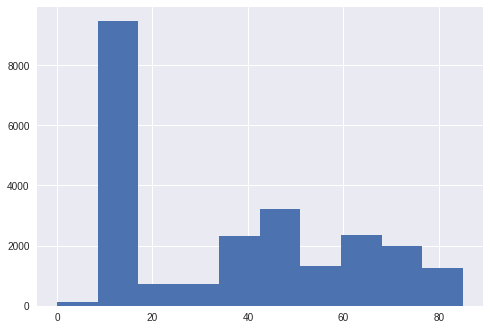

In [0]:
df['age'].hist()

# risk of malignant skin diseases across gender and age

In [0]:
# roughly matches bins by pd.cut(df['age'], 10)
bins = [0, 8.5, 17, 25, 35, 42, 50, 60, 68, 77, 85]
df['age_bucket'] = pd.cut(df['age'], bins)

In [0]:
bad_case = df[df['benign'] == 'malignant']

bad_by_age = bad_case.groupby('age_bucket').size()
total_by_age = df.groupby('age_bucket').size()

risk_by_age = (bad_by_age / total_by_age).reset_index().rename({0:'risk of maligant skin deseases'}, axis='columns')

In [0]:
female = df[df['sex'] == 'female']
female_bad_case = female[female['benign'] == 'malignant']

female_bad_by_age = female_bad_case.groupby('age_bucket').size()
female_by_age = female.groupby('age_bucket').size()

female_risk_by_age = (female_bad_by_age / female_by_age).reset_index().rename({0:'female risk of maligant skin deseases'}, axis='columns')

In [0]:
male = df[df['sex'] == 'male']
male_bad_case = male[male['benign'] == 'malignant']

male_bad_by_age = male_bad_case.groupby('age_bucket').size()
male_by_age = male.groupby('age_bucket').size()

male_risk_by_age = (male_bad_by_age / male_by_age).reset_index().rename({0:'male risk of maligant skin deseases'}, axis='columns')

In [0]:
risks = pd.merge(risk_by_age, female_risk_by_age, on='age_bucket')
risks = pd.merge(risks, male_risk_by_age, on='age_bucket')

In [0]:
debug = pd.concat([total_by_age, bad_by_age, female_by_age, female_bad_by_age, male_by_age, male_bad_by_age], axis=1)

In [0]:
debug

,0,1,2,3,4,5
age_bucket,,,,,,
"(0.0, 8.5]",91,1,36,0,55,1
"(8.5, 17.0]",9465,8,3342,4,6123,4
"(17.0, 25.0]",728,44,424,26,304,18
"(25.0, 35.0]",1752,129,1032,85,720,44
"(35.0, 42.0]",1294,93,709,64,585,29
"(42.0, 50.0]",3212,297,1653,129,1559,168
"(50.0, 60.0]",2539,432,1097,165,1442,267
"(60.0, 68.0]",1139,281,426,75,713,206
"(68.0, 77.0]",1984,498,639,139,1345,359


[Text(0, 0, '(0.0, 8.5]'),
 Text(0, 0, '(8.5, 17.0]'),
 Text(0, 0, '(17.0, 25.0]'),
 Text(0, 0, '(25.0, 35.0]'),
 Text(0, 0, '(35.0, 42.0]'),
 Text(0, 0, '(42.0, 50.0]'),
 Text(0, 0, '(50.0, 60.0]'),
 Text(0, 0, '(60.0, 68.0]'),
 Text(0, 0, '(68.0, 77.0]'),
 Text(0, 0, '(77.0, 85.0]')]

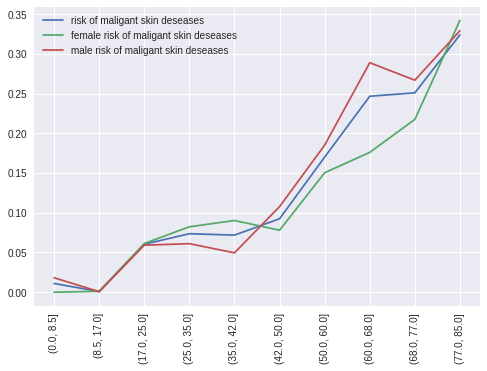

In [0]:
g = risks.plot(xticks=risks.index, rot=90)
g.set_xticklabels(risks.age_bucket)

# Risk across body site and gender

In [0]:
df.columns

Index(['id', 'age', 'diag_confirm', 'anatom_site', 'sex', 'diag', 'benign',
       'melanocytic', 'y', 'x', 'image_type', 'age_bucket'],
      dtype='object')

In [0]:
df['anatom_site'].unique()

array(['lower extremity', 'posterior torso', nan, 'anterior torso',
       'upper extremity', 'head/neck', 'lateral torso', 'palms/soles'],
      dtype=object)

In [0]:
bad_case = df[df['benign'] == 'malignant']

bad_case_by_site = bad_case.groupby('anatom_site').size()
case_by_site = df.groupby('anatom_site').size()

risk_by_site = (bad_case_by_site / case_by_site).reset_index().rename({0:'risk of maligant skin deseases'}, axis='columns')

In [0]:
female_bad_case = female[female['benign'] == 'malignant']

female_bad_case_by_site = female_bad_case.groupby('anatom_site').size()
female_case_by_site = female.groupby('anatom_site').size()

female_risk_by_site = (female_bad_case_by_site / female_case_by_site).reset_index().rename({0:'female risk of maligant skin deseases'}, axis='columns')

In [0]:
male_bad_case = male[male['benign'] == 'malignant']

male_bad_case_by_site = male_bad_case.groupby('anatom_site').size()
male_case_by_site = male.groupby('anatom_site').size()

male_risk_by_site = (male_bad_case_by_site / male_case_by_site).reset_index().rename({0:'male risk of maligant skin deseases'}, axis='columns')

In [0]:
debug2 = pd.concat([case_by_site, bad_case_by_site, female_case_by_site, female_bad_case_by_site, male_case_by_site, male_bad_case_by_site], axis=1)

In [0]:
debug2

,0,1,2,3,4,5
anatom_site,,,,,,
anterior torso,2127,260,885,55,1200,201
head/neck,1690,374,710,118,978,255
lateral torso,75,16,18,1,50,15
lower extremity,3145,405,1780,240,1327,148
palms/soles,30,8,16,3,9,3
posterior torso,3209,538,1257,176,1899,353
upper extremity,1920,455,899,182,990,261


In [0]:
risks2 = pd.merge(risk_by_site, female_risk_by_site, on='anatom_site')
risks2 = pd.merge(risks2, male_risk_by_site, on='anatom_site')

[Text(0, 0, 'anterior torso'),
 Text(0, 0, 'head/neck'),
 Text(0, 0, 'lateral torso'),
 Text(0, 0, 'lower extremity'),
 Text(0, 0, 'palms/soles'),
 Text(0, 0, 'posterior torso'),
 Text(0, 0, 'upper extremity')]

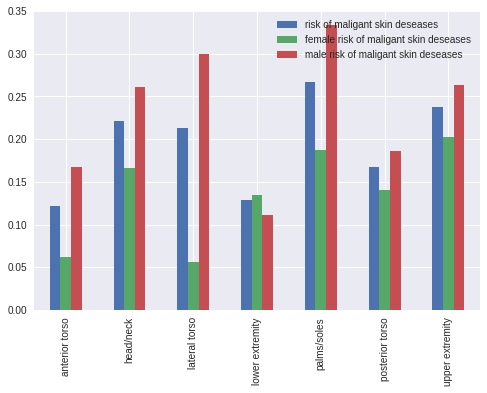

In [0]:
m = risks2.plot(xticks=risks2.index, rot=90, kind='bar')
m.set_xticklabels(risks2.anatom_site)
